# DBSCAN analysis

In [1]:
from sklearn.metrics import *
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read dataset
df_01_scaled = pd.read_csv('../data/HR_comma_sep_01_scaled.csv', index_col=0)

### Choice of attributes

In [3]:
# choice of attributes
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
train_data = df_01_scaled[numerical_features].values

### Choice of epsilon and MinPoints

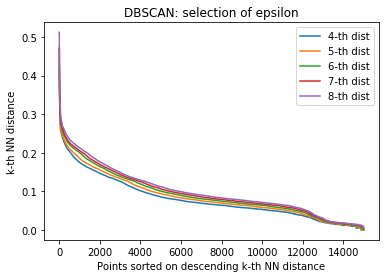

In [4]:
sorted_k_distances = [] # holds sorted_k_dist array for different values of k
# choice of epsilon plotting the k-nearest neighbors distance for each point
start_k, end_k = 4, 9
for k in range(start_k, end_k):
    knn = NearestNeighbors(n_neighbors=k, metric='euclidean')
    knn.fit(train_data)
    dist, ind = knn.kneighbors()
    sorted_k_dist = sorted(dist[:,k-1], reverse=True)
    sorted_k_distances.append(sorted_k_dist)
    
    plt.plot(range(0, len(sorted_k_dist)), sorted_k_dist, label=("%d-th dist" % k))

plt.ylabel('k-th NN distance')
plt.xlabel('Points sorted on descending k-th NN distance')
plt.legend(loc='upper right')
plt.title('DBSCAN: selection of epsilon')
plt.savefig('../images/dbscan_epsilon_selection.png')
plt.show()

In [5]:
# 1. compute diffs for different values of k
diffs_k = [] #  holds diffs for different values of k
for k_distance in sorted_k_distances:
    diffs = [abs(sorted_k_dist[i+1] - sorted_k_dist[i]) for i in range(len(k_distance) - 1)]
    diffs_k.append(diffs)

In [6]:
# 2. get top diffs arguments. Convert the arg to the corresponding candidate points adding +1 to the arg.
n = 20
candidate_elbow_points_k = [] # top n candidates to be elbow points for each k
for diffs in diffs_k:
    top_diffs_args = (-np.array(diffs)).argsort()[:n]
    points = top_diffs_args + 1
    candidate_elbow_points_k.append(points)

In [7]:
# 3. get top diffs values
top_diffs_values_k = []
for diffs in diffs_k:
    top_diffs_args = (-np.array(diffs)).argsort()[:n]
    top_diffs_values = [diffs[i] for i in top_diffs_args]
    top_diffs_values_k.append(top_diffs_values)

In [8]:
# 4. visualize the results
df_elbow_points = dict()
for k in range(start_k, end_k):
    df_elbow_points["%d-points" % k] = candidate_elbow_points_k[k - start_k]
    df_elbow_points["%d-dist diffs" % k] = top_diffs_values_k[k - start_k]
df_elbow_points = pd.DataFrame(df_elbow_points)

df_elbow_points
# the results are the same up to at least 6 digits -> just pick the results for k=4 nearest-neighbor.
# points on the left of the decided threshold are noise points

,4-dist diffs,4-points,5-dist diffs,5-points,6-dist diffs,6-points,7-dist diffs,7-points,8-dist diffs,8-points
0,0.061773,2,0.061773,2,0.061773,2,0.061773,2,0.061773,2
1,0.024506,29,0.024506,29,0.024506,29,0.024506,29,0.024506,29
2,0.024063,4,0.024063,4,0.024063,4,0.024063,4,0.024063,4
3,0.019149,8,0.019149,8,0.019149,8,0.019149,8,0.019149,8
4,0.009879,6,0.009879,6,0.009879,6,0.009879,6,0.009879,6
5,0.008444,15,0.008444,15,0.008444,15,0.008444,15,0.008444,15
6,0.007109,10,0.007109,10,0.007109,10,0.007109,10,0.007109,10
7,0.006203,17,0.006203,17,0.006203,17,0.006203,17,0.006203,17
8,0.005967,19,0.005967,19,0.005967,19,0.005967,19,0.005967,19
9,0.005248,21,0.005248,21,0.005248,21,0.005248,21,0.005248,21


In [9]:
dict_epsilon = pd.DataFrame()
dict_epsilon["point"] = df_elbow_points["4-points"]
dict_epsilon["epsilon"] = [sorted_k_distances[0][i] for i in dict_epsilon["point"].values]
dict_epsilon

,point,epsilon
0,2,0.426373
1,29,0.296560
2,4,0.415149
3,8,0.361829
4,6,0.393018
5,15,0.334452
6,10,0.350909
7,17,0.333307
8,19,0.328674
9,21,0.323135


In [10]:
# for k = 4
dict_dist = dict()
dict_dist["diffs"] = diffs_k[0][:30]  # first n values of difference of distances from 4th nearest neighbor
dict_dist["distances"] = sorted_k_distances[0][:30]  # fist n values of distances from 4th nearest neighbor
df_dist = pd.DataFrame(dict_dist)
df_dist

,diffs,distances
0,0.000000,0.426705
1,0.061773,0.426705
2,0.000000,0.426373
3,0.024063,0.426373
4,0.000000,0.415149
5,0.009879,0.415149
6,0.000000,0.393018
7,0.019149,0.393018
8,0.000000,0.361829
9,0.007109,0.361829


## run DBSCAN with chosen parameters

In [11]:
epsilon = sorted_k_distances[0][29]
epsilon

0.29655978790230358

In [13]:
# DBSCAN
k=4
dbscan = DBSCAN(eps=epsilon, min_samples=k+1, metric='euclidean')
dbscan.fit(train_data)
hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_))))

In [14]:
print 'labels:', dict(zip(bins, hist))

labels: {0: 14968, 1: 8, 2: 6, -1: 17}


In [40]:
# clean dataset from noise points before computing silhouette
def clean_from_noise_points(train_data, labels):
    data = [d for d, l in zip(train_data, labels) if l != -1]
    labels = [l for l in labels if l != -1]
    return data, labels

In [41]:
data, labels = clean_from_noise_points(train_data, dbscan.labels_)

In [42]:
print 'Mean Silhouette Coefficient for all samples:', silhouette_score(data, labels)

Mean Silhouette Coefficient for all samples: 0.301003861581


In [58]:
## trials
k=4
epsilons = np.linspace(start=0.1, stop=0.3, num=30)
silhouettes = []
labels = []
hists = []
binss = []

for eps in epsilons:
    dbscan = DBSCAN(eps=eps, min_samples=k+1, metric='euclidean')
    dbscan.fit(train_data)
    hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_))))
    labels.append(dbscan.labels_)
    hists.append(hist)
    binss.append(bin)

In [59]:
for bins, hist in zip(binss, hists):
    print hist
    #print 'labels:', dict(zip(bins, hist))

[3278 1581  110  207  424  551  263   83    5   60    5   51 1706    8  332
  478 1076  395   29    5    6    9    7 1201    5  767    8 1701   22   16
    6   14   12   27   18    8    5   33   10   23   10    7    5   28   24
   11    5    5   12    6    7    5    7    5    4   10   10   16    5    9
   20    5    6    6   14    5   12    6    5    9    5    5    6    5    5
    6   10    6    8   10    5    4    5    3    5    4    6    5    5    5
    5    5    5    5    5    5    5    6    6    5    5    5]
[3013 1632  112  207  425  551  265   83  385   61    5   52 1713    8  500
 1086   29  453    5    6   10   10 1209    5  770    9 1714  106    6   12
   34    9    5   35   18   34   12    6   11    5    5   12    6    5    7
    5    6    8    7   11   24    5    9   16    8    9    7    6    7    6
    5    5   19    5    9    5    6    5    6    5    5    6    6    5   10
    4    2    5    3    5    5    6    5    3    5    5    5    5    5    5
    5    5    6    6    5 

In [60]:
for l in labels:
    data, label = clean_from_noise_points(train_data, l)
    silho = silhouette_score(data, label)
    silhouettes.append(silho)

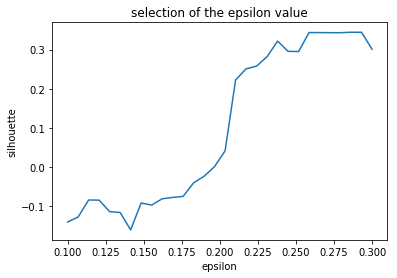

In [61]:
plt.plot(epsilons, silhouettes)
plt.xlabel("epsilon")
plt.ylabel("silhouette")
plt.title("selection of the epsilon value")
plt.show()
plt.savefig("../images/epsilon_vs_silhouette.png")

In [53]:
epsilon=0.275
# DBSCAN
k=4
dbscan = DBSCAN(eps=epsilon, min_samples=k+1, metric='euclidean')
dbscan.fit(train_data)
hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_))))

In [54]:
data, labels = clean_from_noise_points(train_data, dbscan.labels_)

In [55]:
print 'Mean Silhouette Coefficient for all samples:', silhouette_score(data, labels)

Mean Silhouette Coefficient for all samples: 0.343210097623
